In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

# Dataset
from sklearn.datasets import load_digits

In [2]:
# Loading Dataset
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

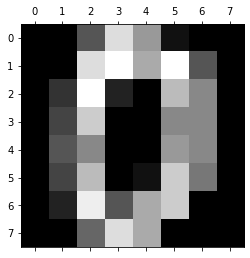

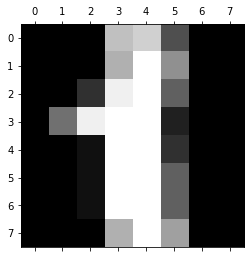

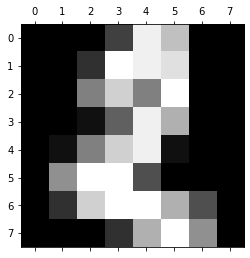

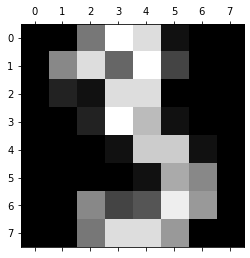

In [5]:
%matplotlib inline
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [8]:
# Data Prep
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [9]:
X_train.shape

(1437, 64)

In [10]:
X_test.shape

(360, 64)

In [11]:
y_train.shape

(1437,)

In [12]:
y_test.shape

(360,)

In [13]:
# Creating Model Object
from sklearn.ensemble import RandomForestClassifier
digits_model = RandomForestClassifier()

In [14]:
# Training Model
digits_model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
# Model Score
print("Model Score : {:.4f}".format(digits_model.score(X_test,y_test)))

Model Score : 0.9750


In [16]:
# Testing
predicted_digits = digits_model.predict(X_test)

In [17]:
# Results
result = pd.DataFrame({'Actual Digit':y_test,'Predicted Digit':predicted_digits})
result.head()

,Actual Digit,Predicted Digit
0,3,5
1,0,0
2,1,1
3,3,3
4,0,0


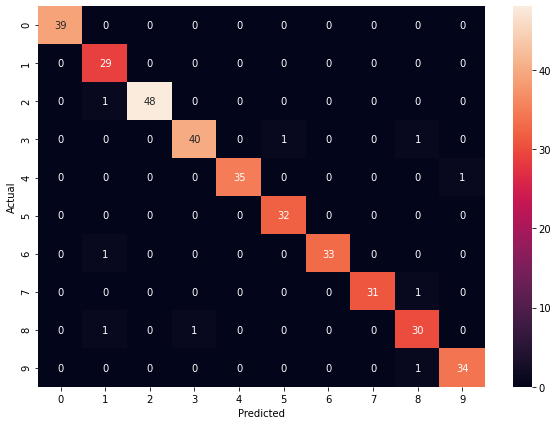

In [23]:
# Visualizing Results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_digits)

plt.figure(figsize=(10,7))
sbn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Exporting Results to CSV file
result.to_csv("result.csv",index=False)

In [19]:
# Saving Trained Model to Binary File
import joblib
joblib.dump(digits_model,"digits-model-random-forest")

['digits-model-random-forest']